In [ ]:
import cv2
import numpy as np
import os
from skimage.io import imread
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap, hist
from scipy import ndimage
from scipy.fftpack import fft , fft2 ,fftshift , ifftshift , ifft2

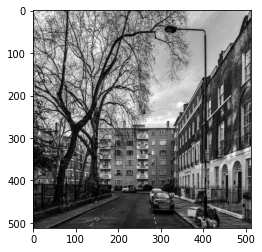

In [130]:
from matplotlib import pyplot as plt
import skimage
img_rgb=cv2.imread("/content/photo-1590992133988-6ffb251c607e.jpg")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img_gray=cv2.resize(img_gray, (512,512))
plt.imshow(img_gray, cmap = 'gray')
plt.show()



In [131]:
import random
shape = img_gray.shape[0], img_gray.shape[1]
x , y = np.meshgrid(range(0, shape[0]), range(0, shape[1]))
add = 1 + np.sin(x + y / 1.5);
noised_img = ((img_gray)/ 128 + add)/4;
  

(-0.5, 511.5, 511.5, -0.5)

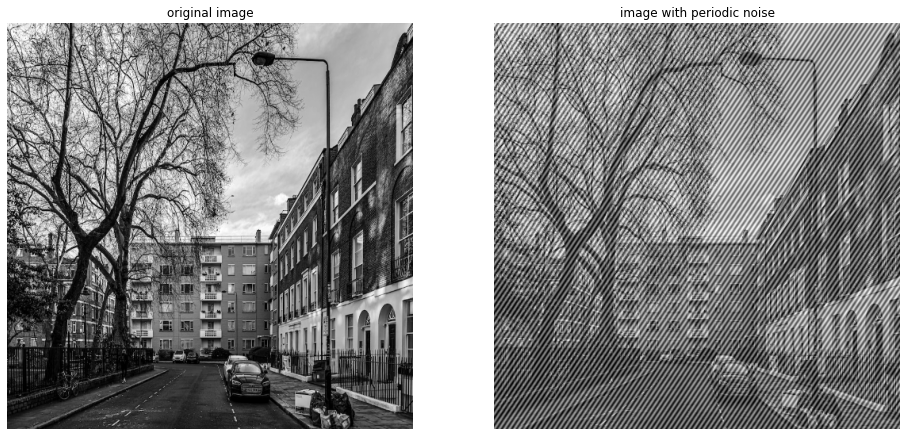

In [133]:
from IPython.core.pylabtools import figsize
figure, (axis0, axis1) = plt.subplots(ncols= 2, figsize = (16, 8))
axis0.imshow(img_gray, cmap = "gray")
axis0.set_title("original image")
axis0.axis("off")

axis1.imshow(noised_img , cmap = "gray")
axis1.set_title("image with periodic noise")
axis1.axis("off")

### Convert the image to frequency domain by Fourier transform.




1.   Then by notch filter removed make mask to remove the signal noise.
2.   Applied the filter to the shifted image.
3.   Then inverse it from Fourier transformation.








In [134]:
spectrum = fft2(noised_img) 
spectrum = fftshift(spectrum)
freq_noisy_Image=20*np.log(np.abs(spectrum))
noise_filter = np.ones(shape=(512,512))
noise_filter[175:210, 160:195] = 0#top left
noise_filter[290:320, 160:195] = 0#bottom left
noise_filter[175:205, 320:355] = 0#top right
noise_filter[290:320, 320:355] = 0#bottom right

img_without_noise = ifft2(fftshift(spectrum*noise_filter))

img_without_nois_mag=np.abs(img_without_noise)
freq_without_noise_mag=20*np.log(np.abs(spectrum))*noise_filter

Text(0.5, 1.0, 'frequency of denoised image')

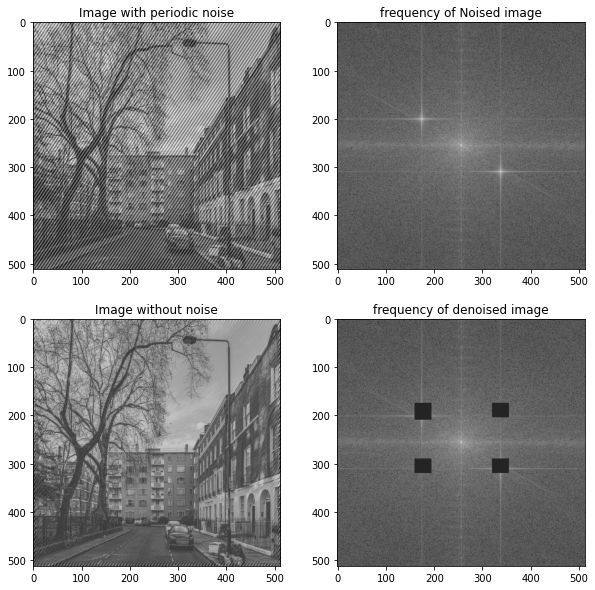

In [135]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax.ravel()


ax1.imshow(noised_img, cmap=plt.cm.gray)
ax1.set_title('Image with periodic noise')

ax2.imshow(freq_noisy_Image, cmap=plt.cm.gray)
ax2.set_title('frequency of Noised image')


ax3.imshow(img_without_nois_mag, cmap=plt.cm.gray)
ax3.set_title('Image without noise')

ax4.imshow(freq_without_noise_mag, cmap=plt.cm.gray)
ax4.set_title('frequency of denoised image')

(-0.5, 511.5, 511.5, -0.5)

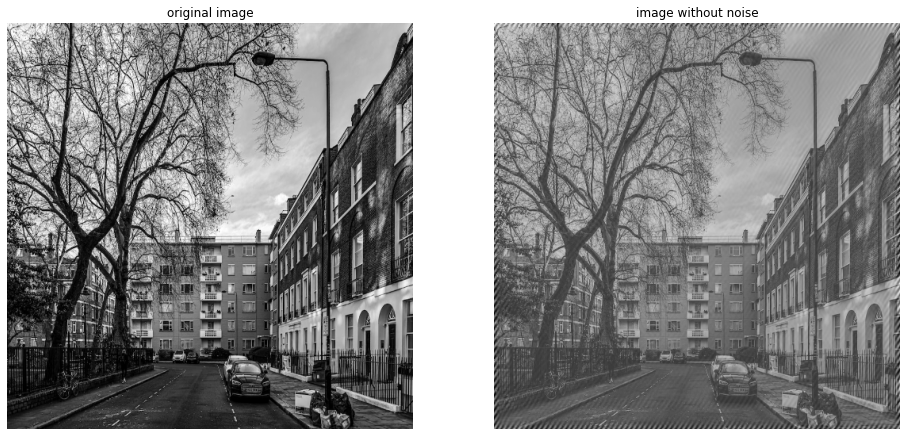

In [136]:
figure, (axis0, axis1) = plt.subplots(ncols= 2, figsize = (16, 8))
axis0.imshow(img_gray, cmap = "gray")
axis0.set_title("original image")
axis0.axis("off")

axis1.imshow(img_without_nois_mag, cmap = "gray")
axis1.set_title("image without noise")
axis1.axis("off")